In [1]:
import os
# os.chdir('/cluster/home/kruu/git/eye_tracking/')
os.chdir('/home/kruu/git_folder/eye_tracking/')

import pandas as pd
import numpy as np
from utils.data_processing import EyeTrackingProcessor

import matplotlib.pyplot as plt

In [2]:
data_path = "/store/kruu/eye_tracking"
files_list = os.listdir(data_path)
files_list = [os.path.join(data_path, file) for file in files_list if file.endswith(".tsv")]

tasks = ['Task 1', 'Task 2', 'Task 3', 'Task 4', 'Task 5', 'Task 6']
features = ['Recording timestamp', 'Gaze point X', 'Gaze point Y', 'Mouse position X', 'Mouse position Y', 'Event', 'Participant name']
interpolate_col = ['Recording timestamp', 'Gaze point X', 'Gaze point Y', 'Mouse position X', 'Mouse position Y', 'Blink']

processor = EyeTrackingProcessor()
all_data = processor.load_data(files_list)
dataset_raw = processor.get_features(all_data, tasks, features)
dataset, blinks = processor.detect_blinks(dataset_raw)
    

/home/kruu/git_folder/eye_tracking/utils/data_processing.py:14: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep='\t')
/home/kruu/git_folder/eye_tracking/utils/data_processing.py:14: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep='\t')
/home/kruu/git_folder/eye_tracking/utils/data_processing.py:14: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep='\t')
/home/kruu/git_folder/eye_tracking/utils/data_processing.py:14: DtypeWarning: Columns (75,76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep='\t')


In [4]:
if "id" not in dataset_raw.columns:
    dataset_raw["id"] = (
        dataset_raw["Participant name"].astype(str)
        + "_" + dataset_raw["Task_id"].astype(str)
        + "_" + dataset_raw["Task_execution"].astype(str)
    )

if "id" not in dataset.columns:
    dataset["id"] = (
        dataset["Participant name"].astype(str)
        + "_" + dataset["Task_id"].astype(str)
        + "_" + dataset["Task_execution"].astype(str)
    )

****
# Raw timeseries
****

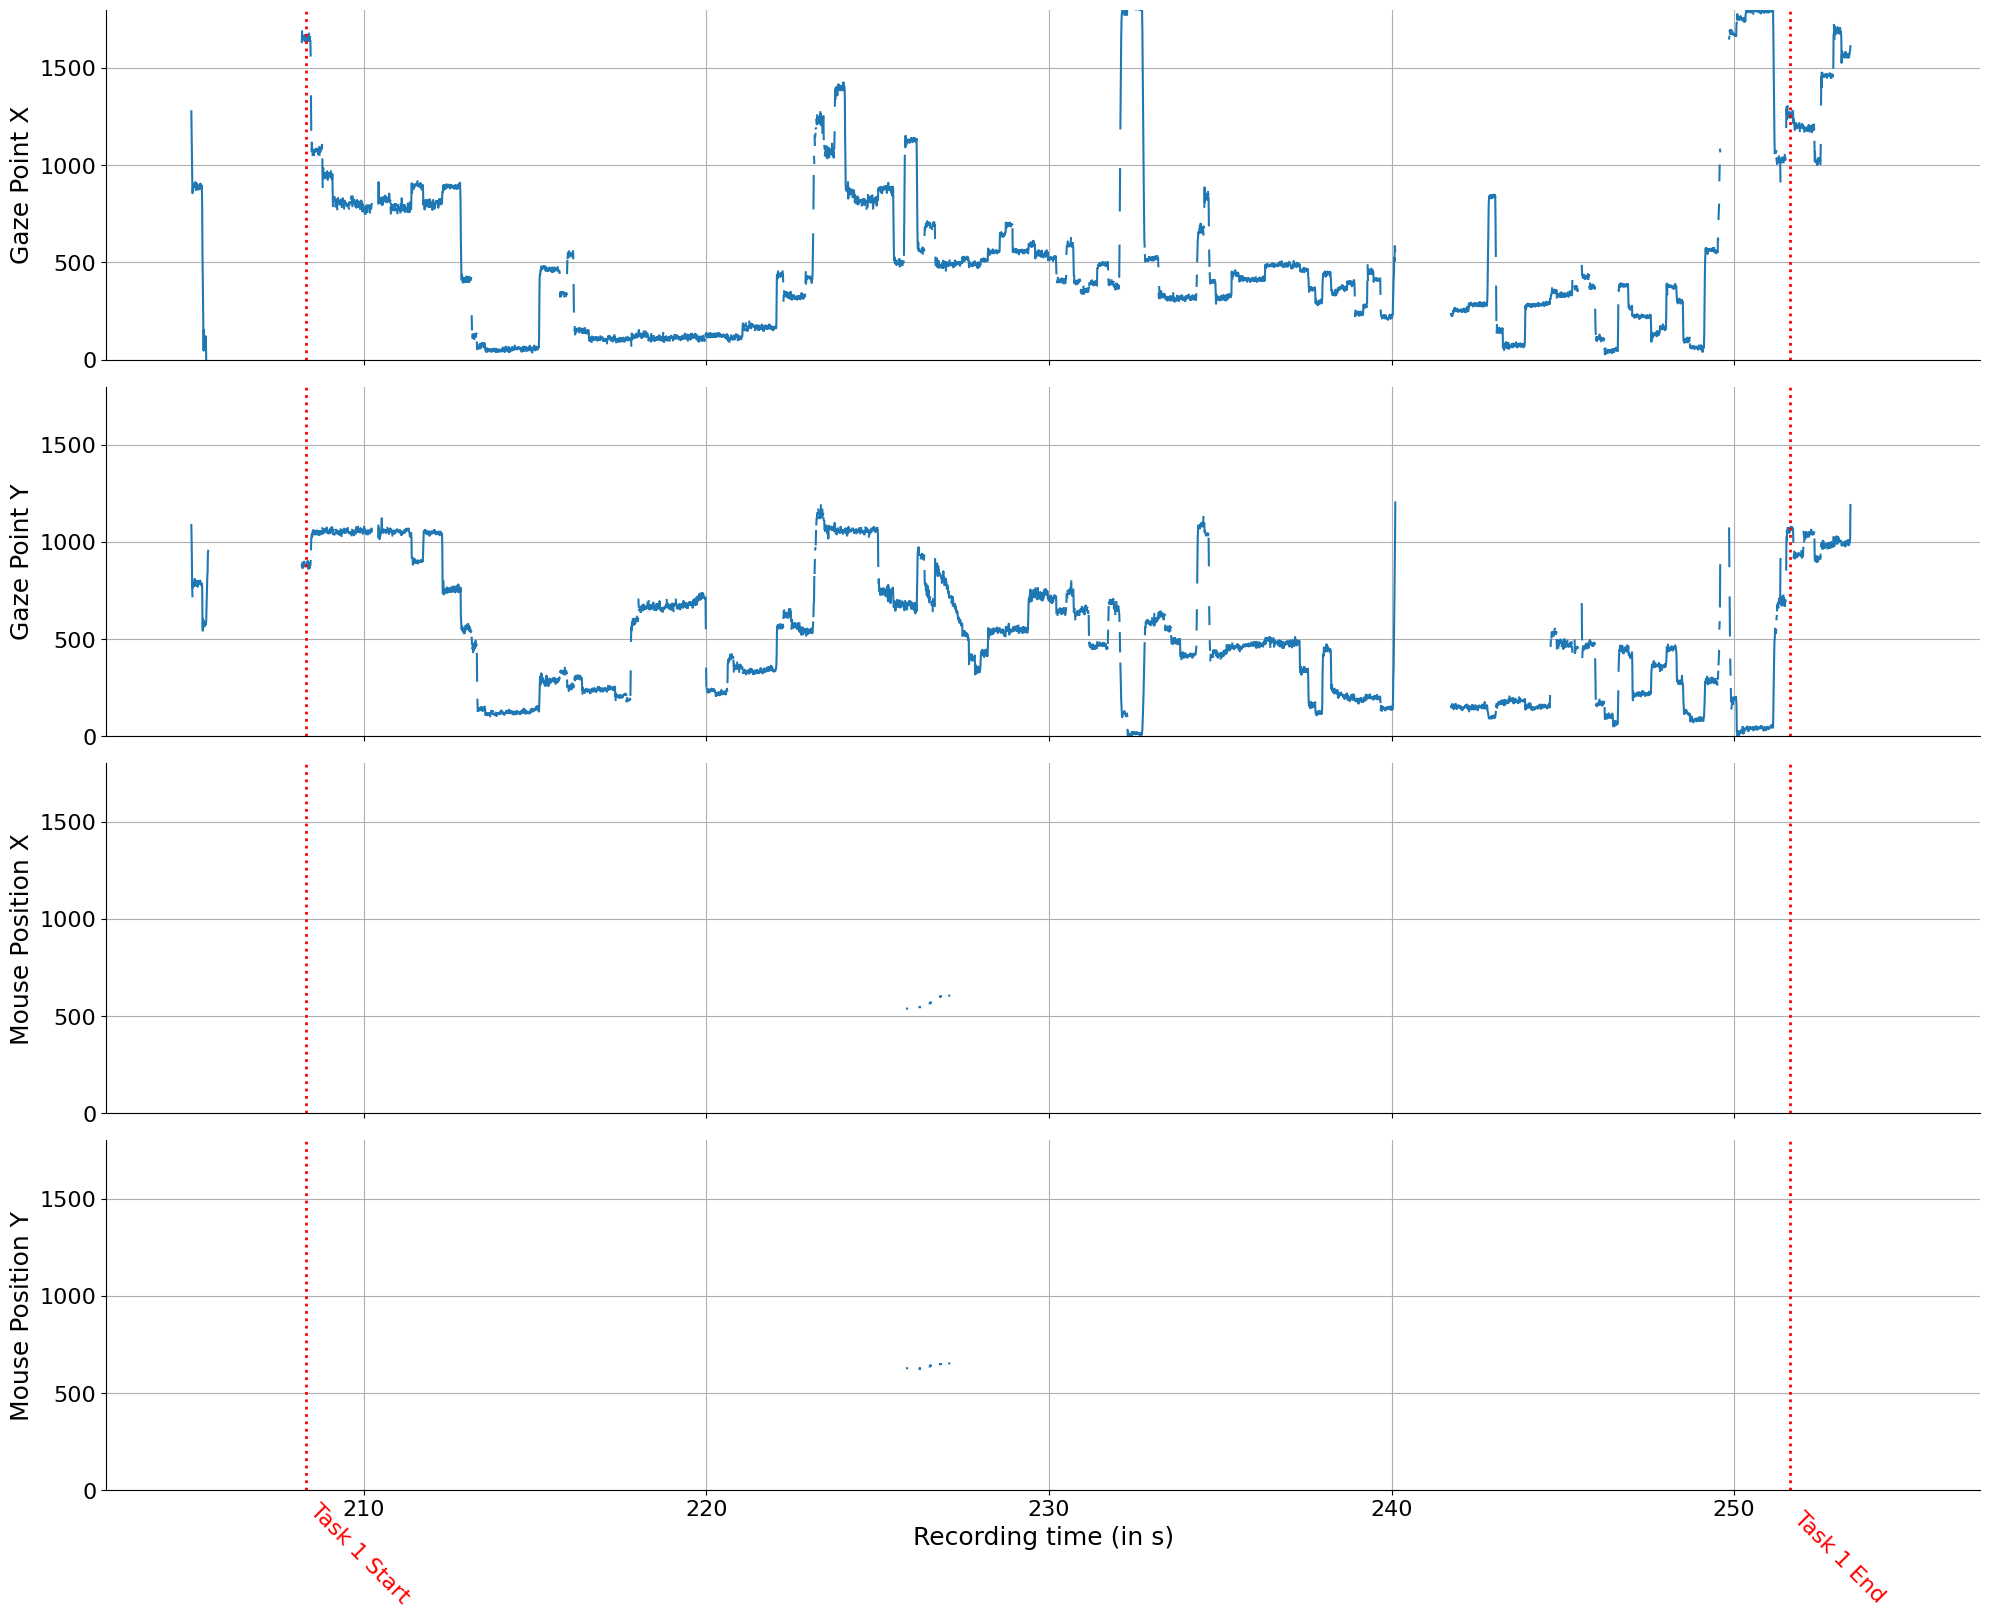

In [24]:
task_start = all_data[0].query("Event == 'Task 1'").index[0]
task_end = all_data[0].query("Event == 'Task 1 end'").index[0]
pad = 500
task1_plot = all_data[0].loc[task_start-500:task_end+500]

fig, axs = plt.subplots(4, 1, figsize=(20, 16), sharex=True)
# Convert timestamps to seconds
timestamps_sec = task1_plot["Recording timestamp"] / 1e6
start_time_sec = task1_plot.loc[task_start]["Recording timestamp"] / 1e6
end_time_sec = task1_plot.loc[task_end]["Recording timestamp"] / 1e6

# Titles for each subplot
titles = ['Gaze Point X', 'Gaze Point Y', 'Mouse Position X', 'Mouse Position Y']
data_columns = ['Gaze point X', 'Gaze point Y', 'Mouse position X', 'Mouse position Y']

# Plot each subplot
for ax, title, col in zip(axs, titles, data_columns):
    ax.plot(timestamps_sec, task1_plot[col], label=title)
    ax.axvline(x=start_time_sec, color='red', linestyle=':', linewidth=2)
    ax.axvline(x=end_time_sec, color='red', linestyle=':', linewidth=2)
    ax.set_ylim(0, 1800)
    ax.set_ylabel(title)
    ax.grid(True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# Add labels directly to vertical lines on the top subplot only
axs[-1].text(start_time_sec, -600, 'Task 1 Start', color='red', rotation=-45, verticalalignment='bottom', fontsize = 16)
axs[-1].text(end_time_sec, -600, 'Task 1 End', color='red', rotation=-45, verticalalignment='bottom', fontsize = 16)

# X-axis label on the last subplot
axs[-1].set_xlabel('Recording time (in s)', fontsize = 18)

for ax in axs:
    ax.tick_params(axis='both', labelsize=16)
    ax.set_ylabel(ax.get_ylabel(), fontsize=18)

plt.tight_layout()
plt.show()


****
# Blink
****

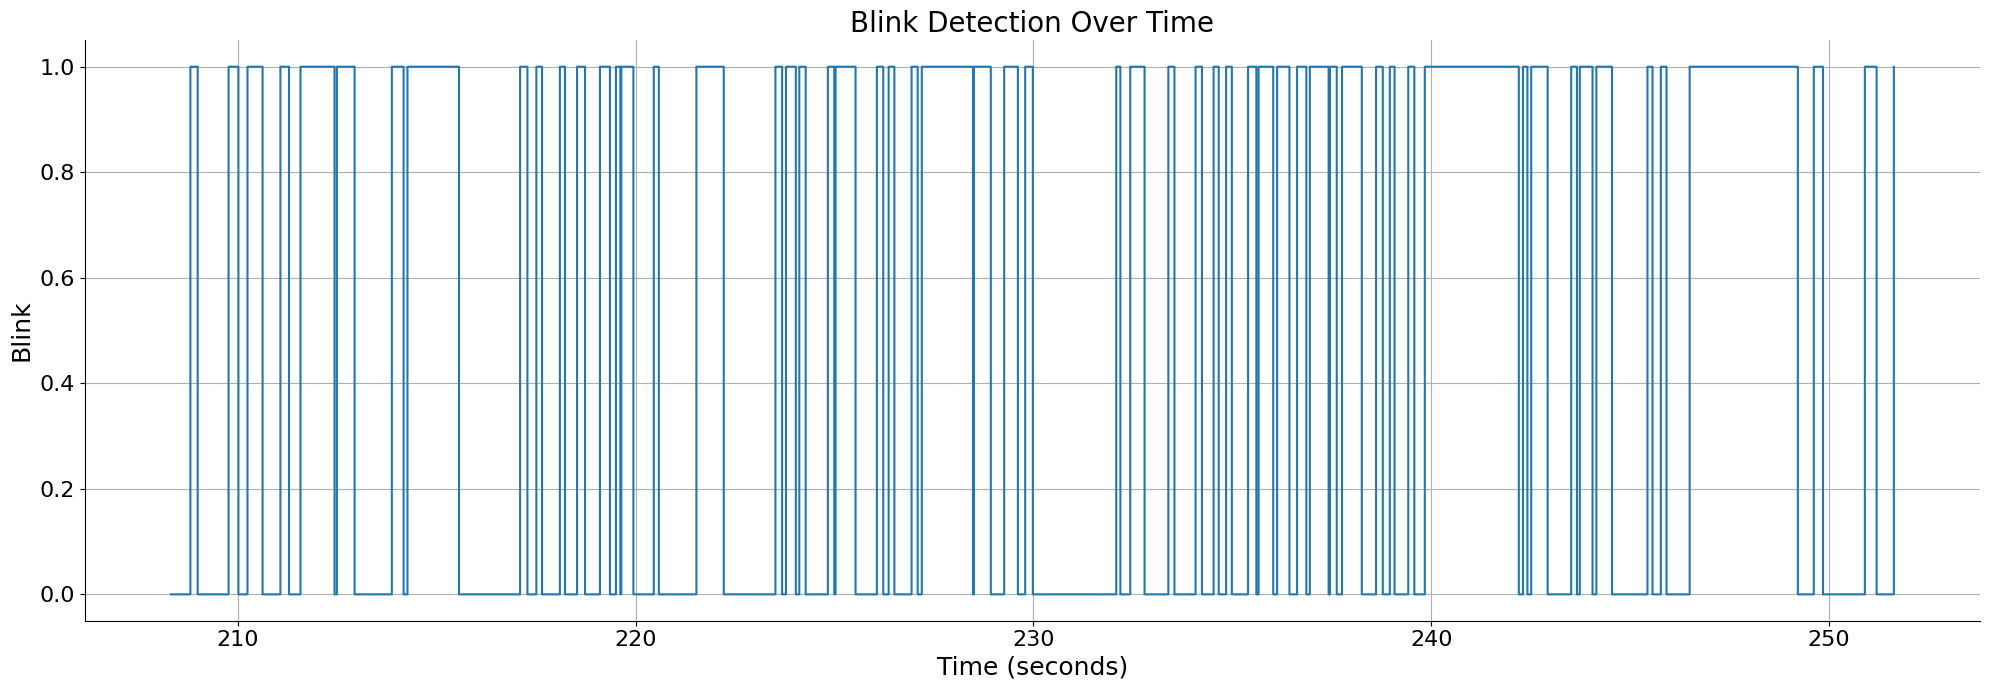

In [25]:
task1_plot = dataset.query("id == '1_1_0'")

fig, ax = plt.subplots(1, 1, figsize=(20, 7), sharex=True)
# Convert timestamps to seconds
timestamps_sec = task1_plot["Recording timestamp"] / 1e6

ax.step(timestamps_sec, task1_plot["Blink"], label="Blink", where="post", color='tab:blue')
ax.set_ylabel("Blink", fontsize=18)
ax.set_xlabel("Time (seconds)", fontsize=18)
ax.set_title("Blink Detection Over Time", fontsize=20)
ax.grid(True)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(axis='both', labelsize=16)
ax.set_ylabel(ax.get_ylabel(), fontsize=18)

plt.tight_layout()
plt.show()

****
# Filled features
****

/tmp/ipykernel_399098/948023079.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  task1_plot[col] = task1_plot[col].ffill().bfill()


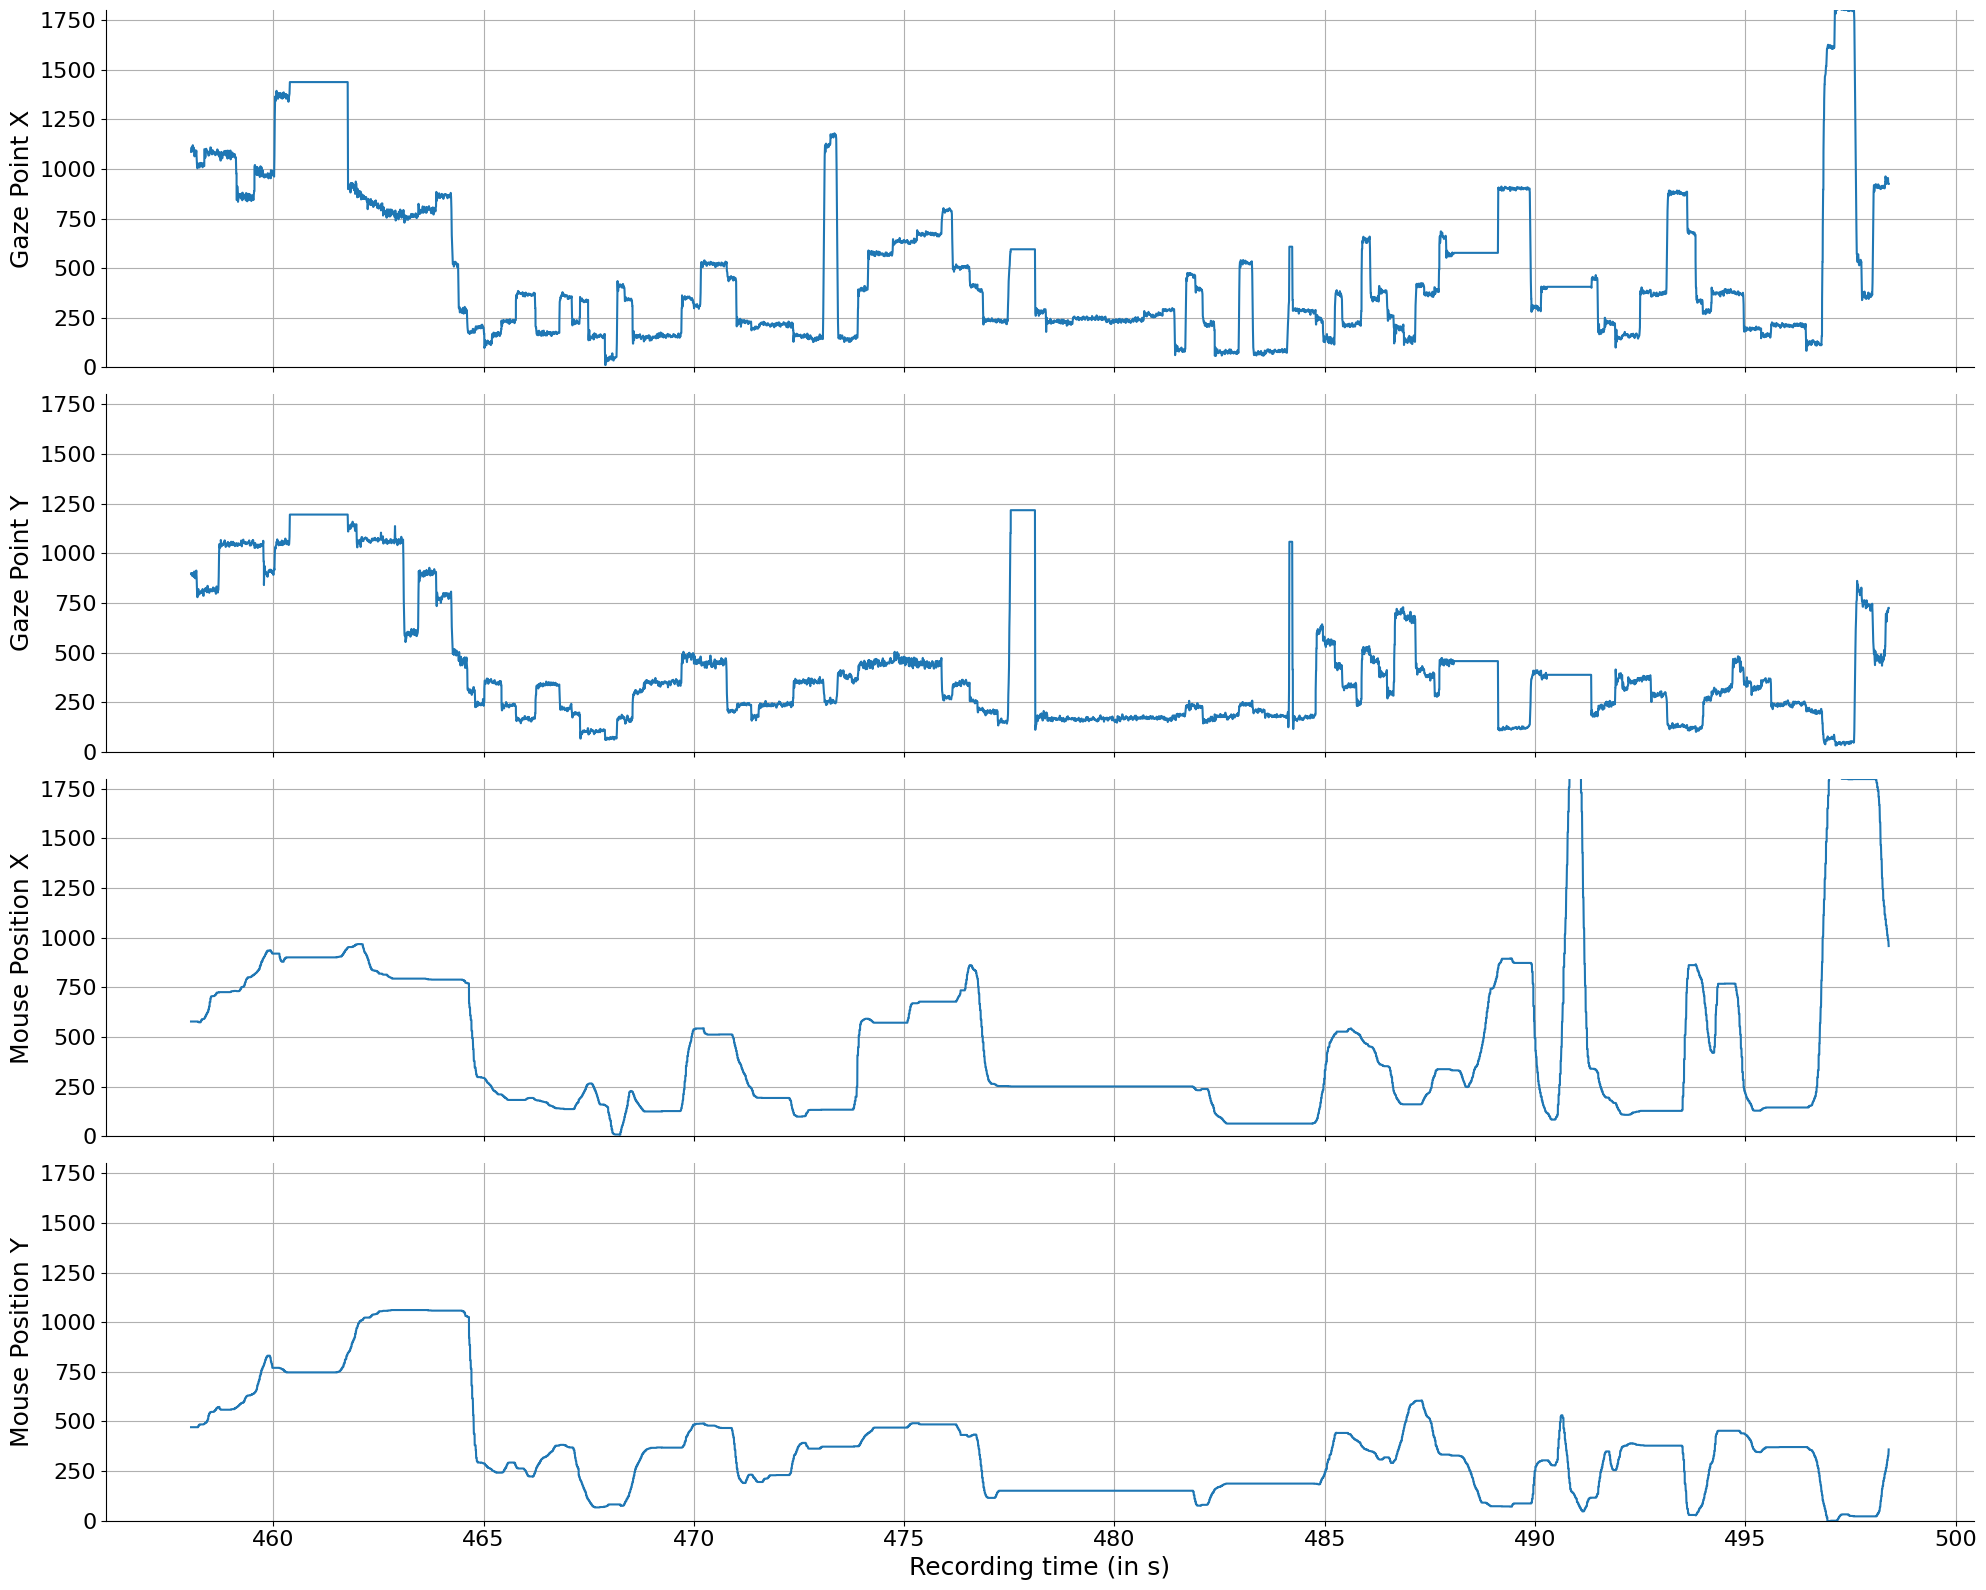

In [26]:
task1_plot = dataset.query("id == '1_1_1'")

fig, axs = plt.subplots(4, 1, figsize=(20, 16), sharex=True)
timestamps_sec = task1_plot["Recording timestamp"] / 1e6

# Titles for each subplot
titles = ['Gaze Point X', 'Gaze Point Y', 'Mouse Position X', 'Mouse Position Y']
data_columns = ['Gaze point X', 'Gaze point Y', 'Mouse position X', 'Mouse position Y']

for col in data_columns:
    task1_plot[col] = task1_plot[col].ffill().bfill()

# Plot each subplot
for ax, title, col in zip(axs, titles, data_columns):
    ax.plot(timestamps_sec, task1_plot[col], label=title)
    ax.set_ylim(0, 1800)
    ax.set_ylabel(title)
    ax.grid(True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# X-axis label on the last subplot
axs[-1].set_xlabel('Recording time (in s)', fontsize = 18)

for ax in axs:
    ax.tick_params(axis='both', labelsize=16)
    ax.set_ylabel(ax.get_ylabel(), fontsize=18)

plt.tight_layout()
plt.show()

****
# JCAFNet inputs
****

In [29]:
from trainings.jcafnet_training import load_and_process

tasks = ['Task 1', 'Task 2', 'Task 3', 'Task 4', 'Task 5', 'Task 6']
cols = ['Recording timestamp', 'Gaze point X', 'Gaze point Y', 'Mouse position X', 'Mouse position Y', 'Event', 'Participant name']
interpolate_cols = ['Recording timestamp', 'Gaze point X', 'Gaze point Y', 'Mouse position X', 'Mouse position Y', 'Blink']
fill_cols = ["Mouse position X", "Mouse position Y", "Gaze point X", "Gaze point Y"]
    

dataset_time_resampled = load_and_process(
            data_path=data_path,
            tasks=tasks,
            columns=cols,
            interpolate_cols=interpolate_cols,
            fill_cols=fill_cols
        )

/home/kruu/git_folder/eye_tracking/utils/data_processing.py:14: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep='\t')
/home/kruu/git_folder/eye_tracking/utils/data_processing.py:14: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep='\t')
/home/kruu/git_folder/eye_tracking/utils/data_processing.py:14: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep='\t')
/home/kruu/git_folder/eye_tracking/utils/data_processing.py:14: DtypeWarning: Columns (75,76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep='\t')


/tmp/ipykernel_3880314/2192426872.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  task1_plot[col] = task1_plot[col].ffill().bfill()


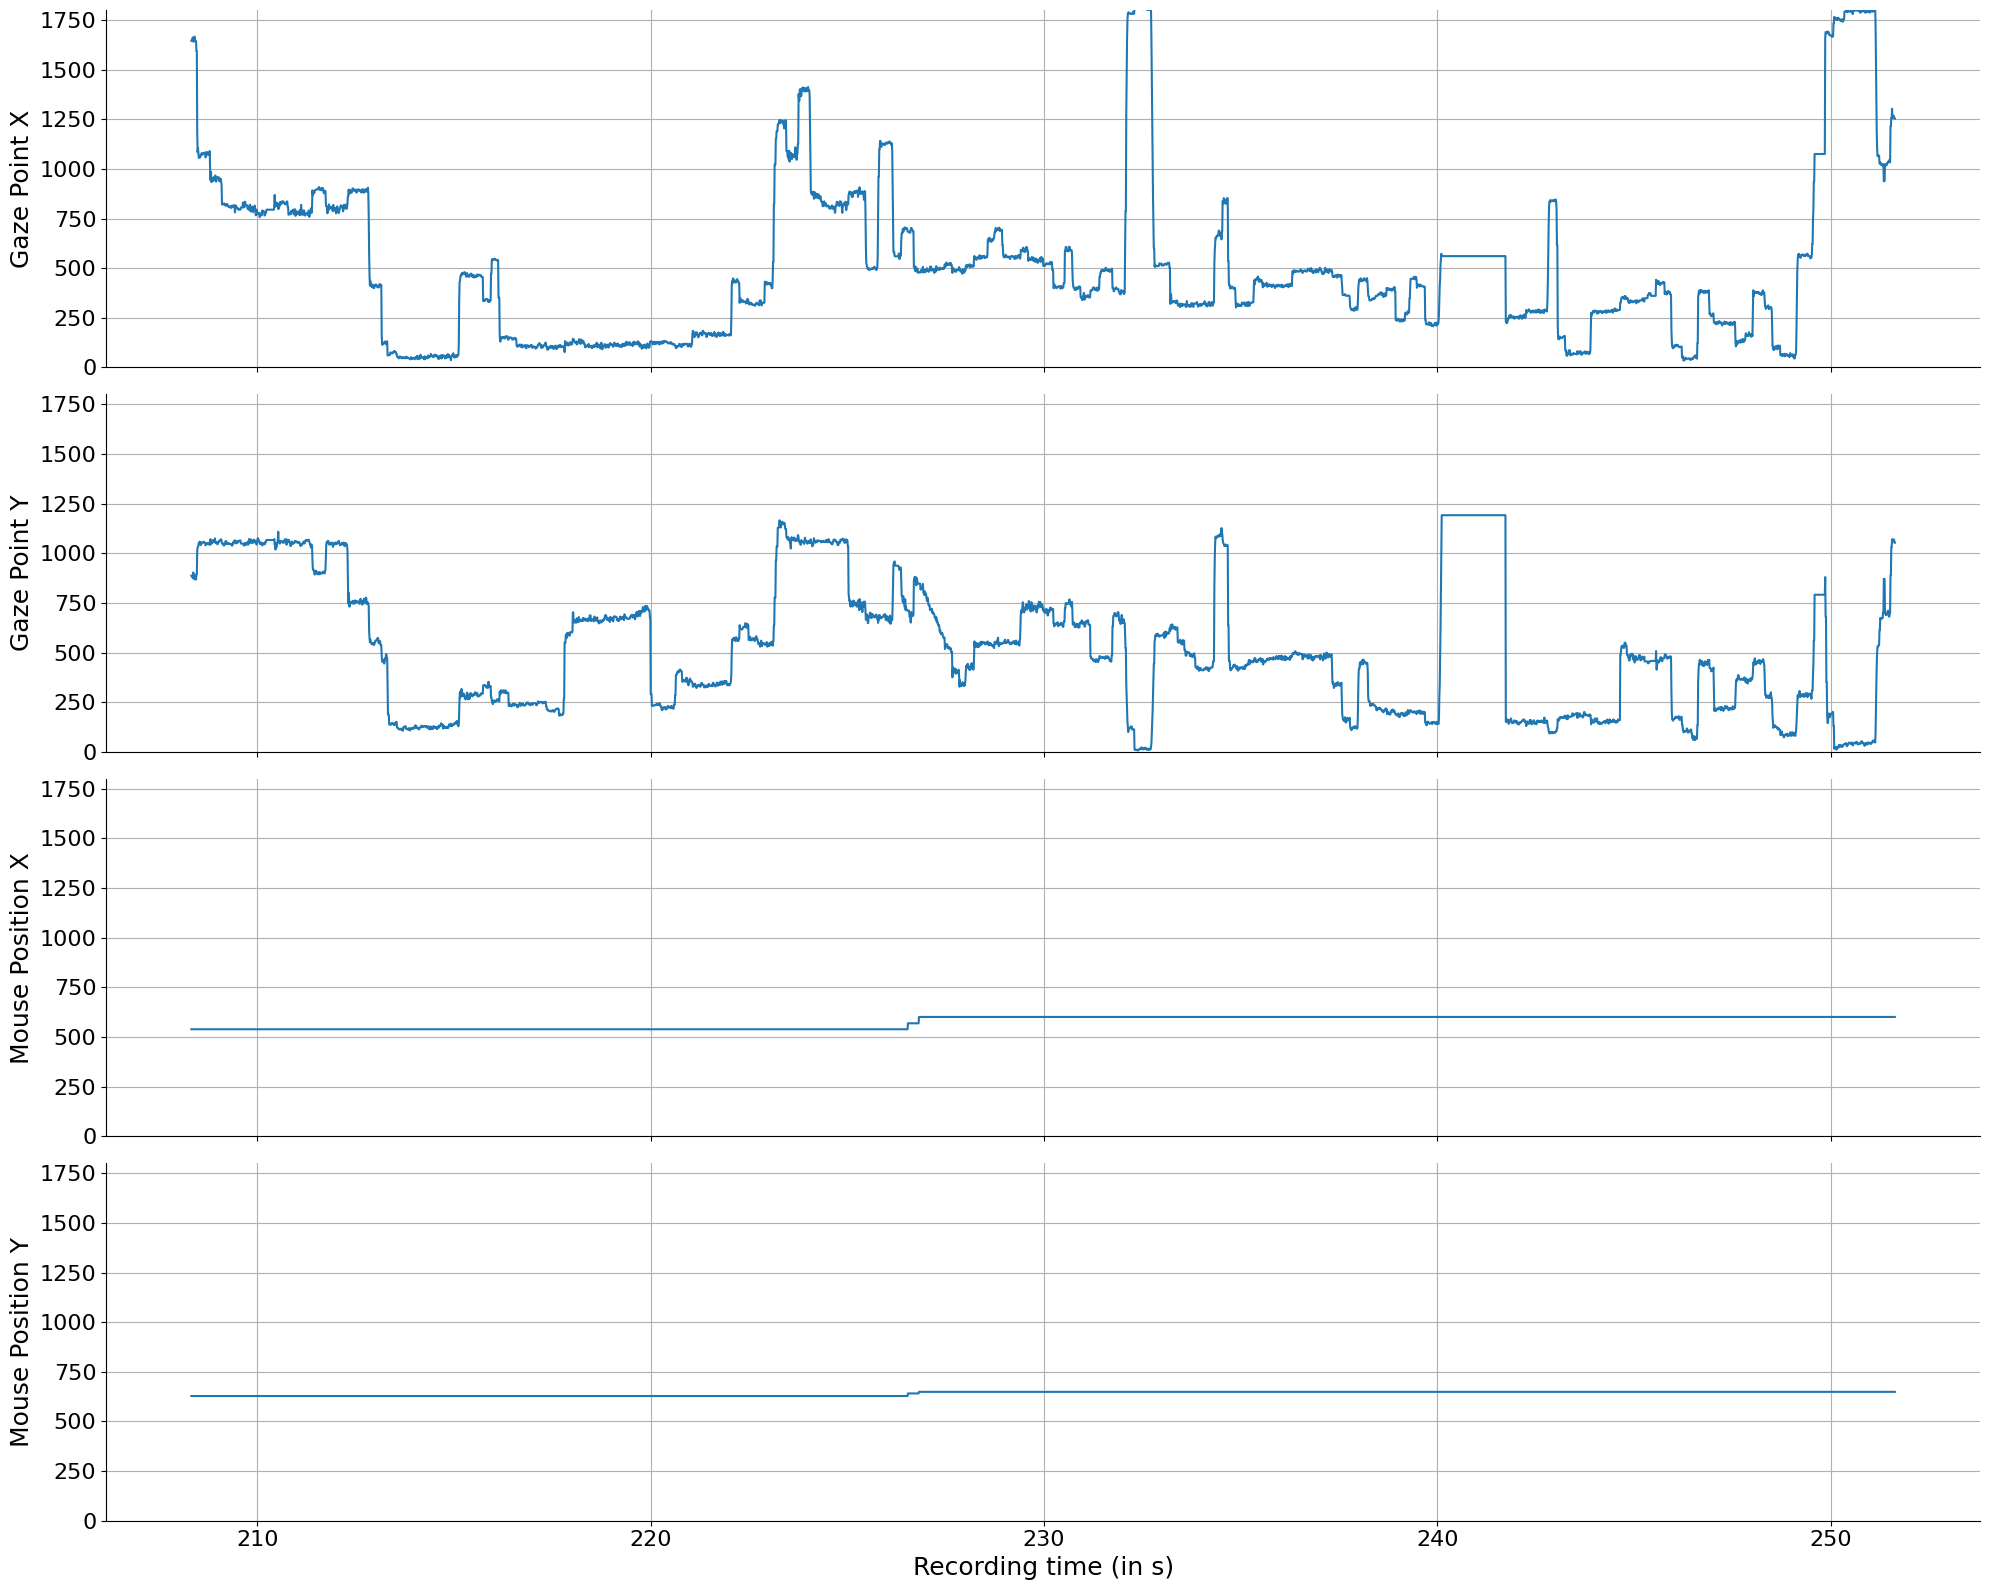

In [31]:
task1_plot = dataset_time_resampled.query("id == '1_1_0'")

fig, axs = plt.subplots(4, 1, figsize=(20, 16), sharex=True)
timestamps_sec = task1_plot["Recording timestamp"] / 1e6

# Titles for each subplot
titles = ['Gaze Point X', 'Gaze Point Y', 'Mouse Position X', 'Mouse Position Y']
data_columns = ['Gaze point X', 'Gaze point Y', 'Mouse position X', 'Mouse position Y']

for col in data_columns:
    task1_plot[col] = task1_plot[col].ffill().bfill()

# Plot each subplot
for ax, title, col in zip(axs, titles, data_columns):
    ax.plot(timestamps_sec, task1_plot[col], label=title)
    ax.set_ylim(0, 1800)
    ax.set_ylabel(title)
    ax.grid(True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# X-axis label on the last subplot
axs[-1].set_xlabel('Recording time (in s)', fontsize = 18)

for ax in axs:
    ax.tick_params(axis='both', labelsize=16)
    ax.set_ylabel(ax.get_ylabel(), fontsize=18)

plt.tight_layout()
plt.show()

In [32]:
from trainings.jcafnet_training import enrich_with_gaze_mouse_metrics
dataset_enriched = enrich_with_gaze_mouse_metrics(task1_plot)

Enriching features: 100%|██████████| 1/1 [00:00<00:00, 75.23it/s]


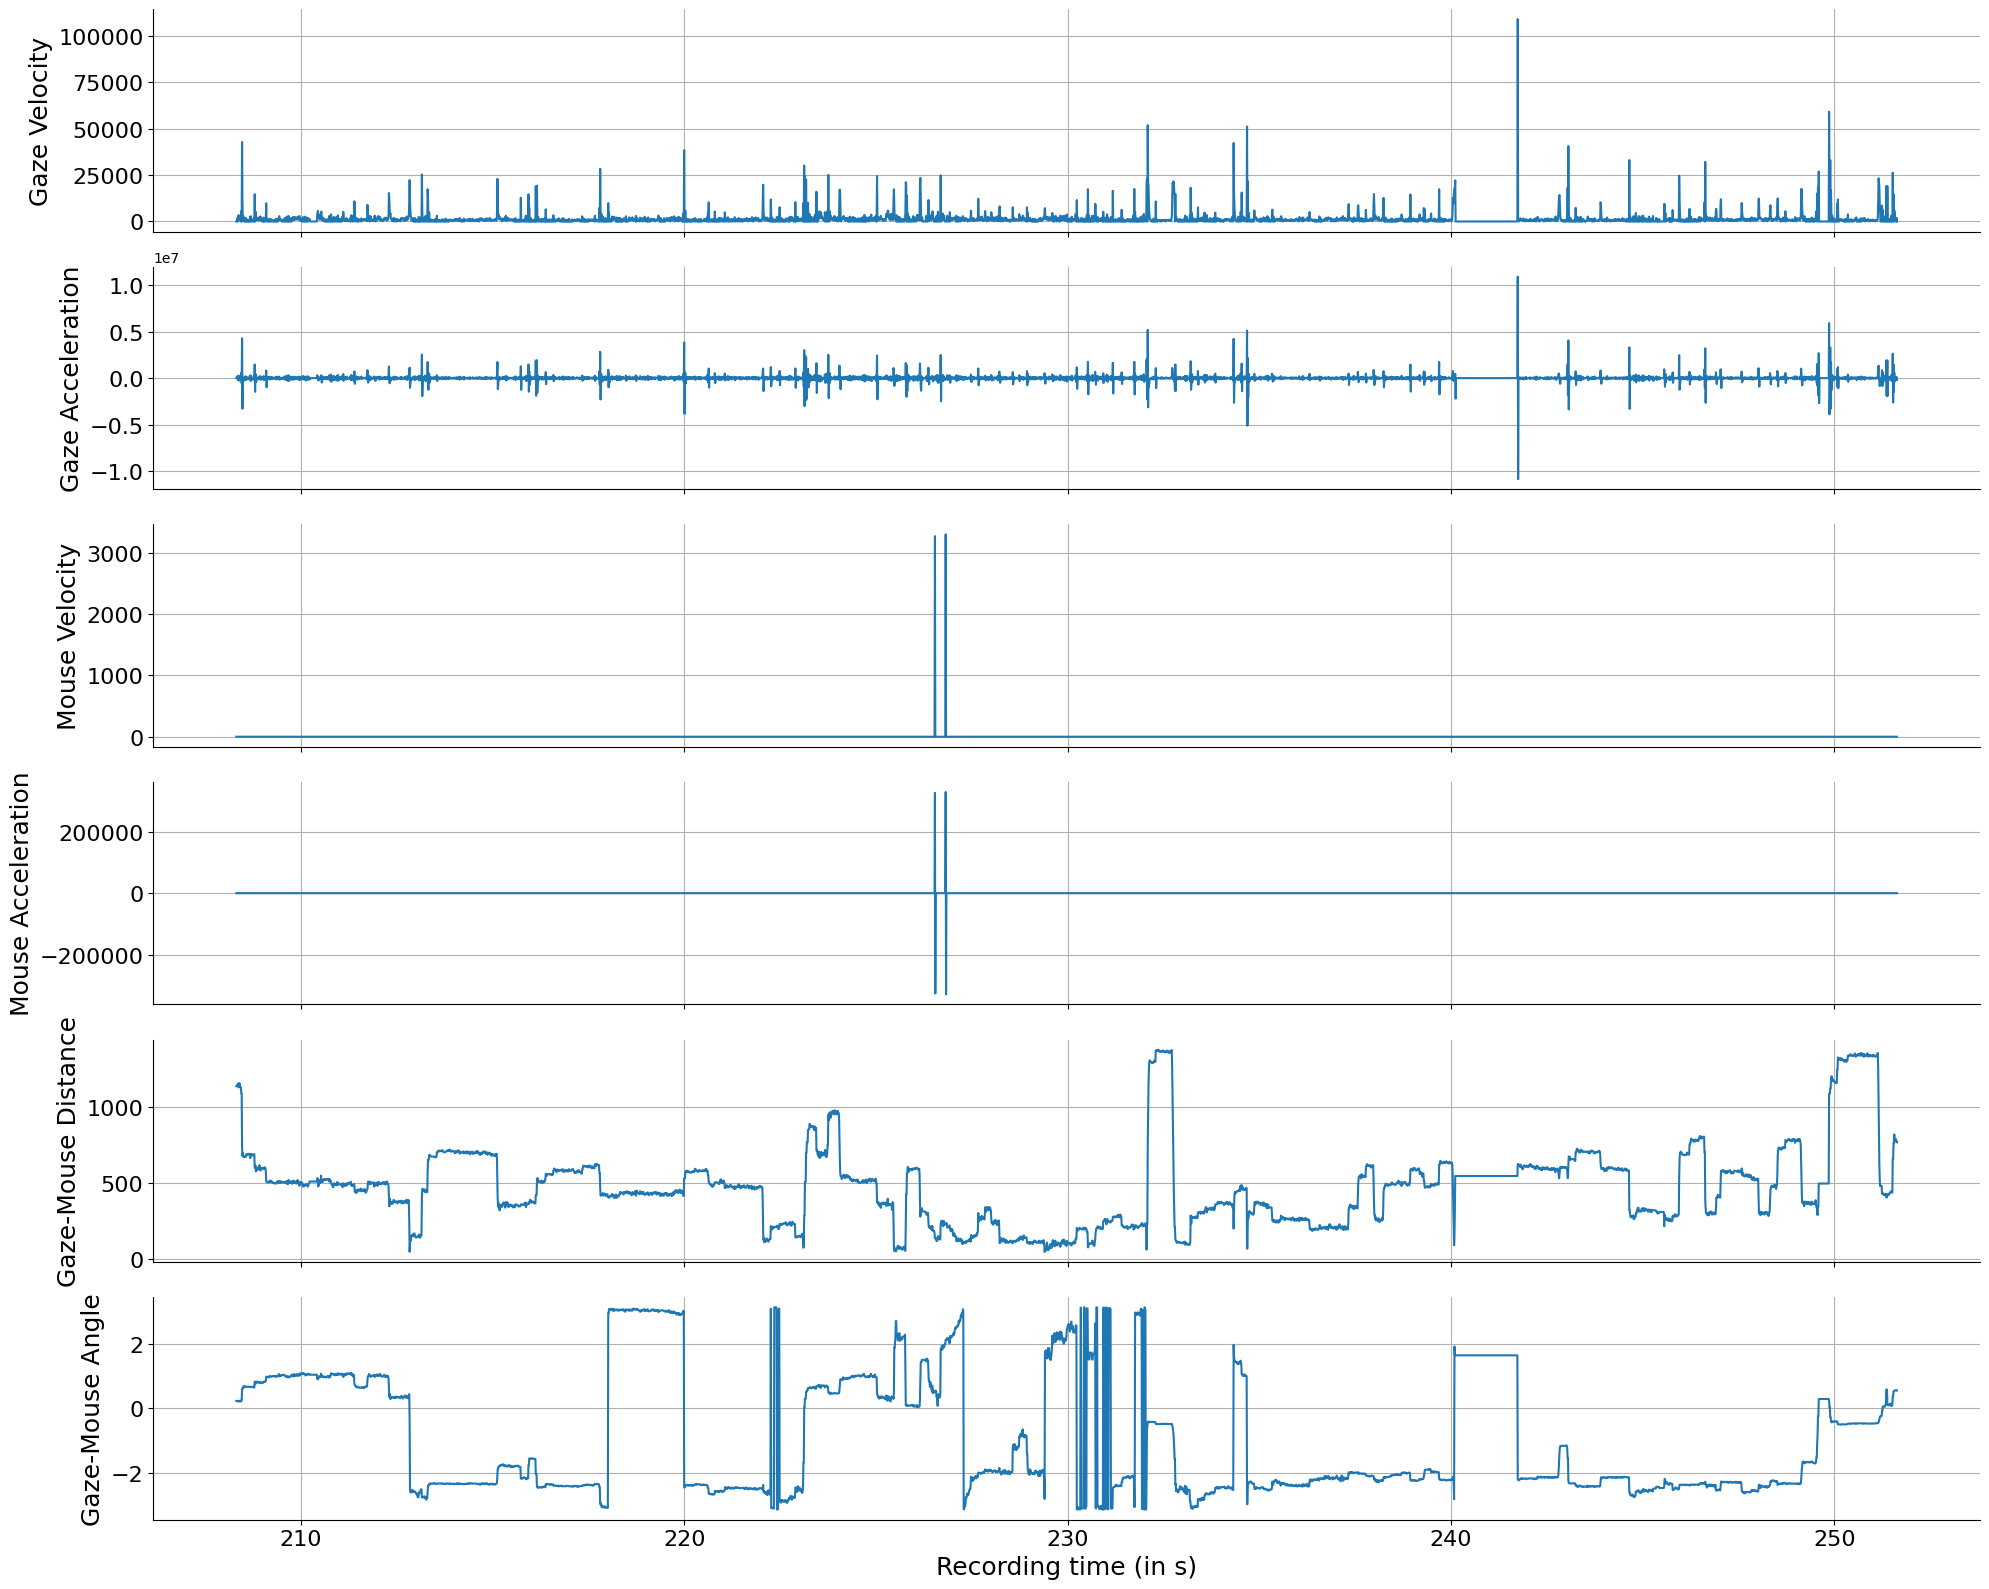

In [36]:
fig, axs = plt.subplots(6, 1, figsize=(20, 16), sharex=True)
timestamps_sec = dataset_enriched["Recording timestamp"] / 1e6

# Titles for each subplot
titles = ['Gaze Velocity', 'Gaze Acceleration', 'Mouse Velocity', 'Mouse Acceleration', 'Gaze-Mouse Distance', 'Gaze-Mouse Angle']
data_columns = ['Gaze Velocity', 'Gaze Acceleration', 'Mouse Velocity', 'Mouse Acceleration', 'Gaze-Mouse Distance', 'Angle Between Gaze and Mouse']

# Plot each subplot
for ax, title, col in zip(axs, titles, data_columns):
    ax.plot(timestamps_sec, dataset_enriched[col], label=title)
    ax.set_ylabel(title)
    ax.grid(True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# X-axis label on the last subplot
axs[-1].set_xlabel('Recording time (in s)', fontsize = 18)

for ax in axs:
    ax.tick_params(axis='both', labelsize=16)
    ax.set_ylabel(ax.get_ylabel(), fontsize=18)

plt.tight_layout()
plt.show()